# Importation:

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys

sys.path.append('..')
import fidle.pwk as pwk
import fidle.libfile as libfile
datasets_dir = pwk.init('MNIST1')

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0.10
Notebook id          : MNIST1
Run time             : Wednesday 24 February 2021, 10:04:23
TensorFlow version   : 2.2.0
Keras version        : 2.3.0-tf
Datasets dir         : /home/nadourh/Dropbox/PhD_/programming/Initiation_au_Deep_Learning
Run dir              : ./run
Update keras cache   : False


# Step1 Load data:

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000, 28, 28)


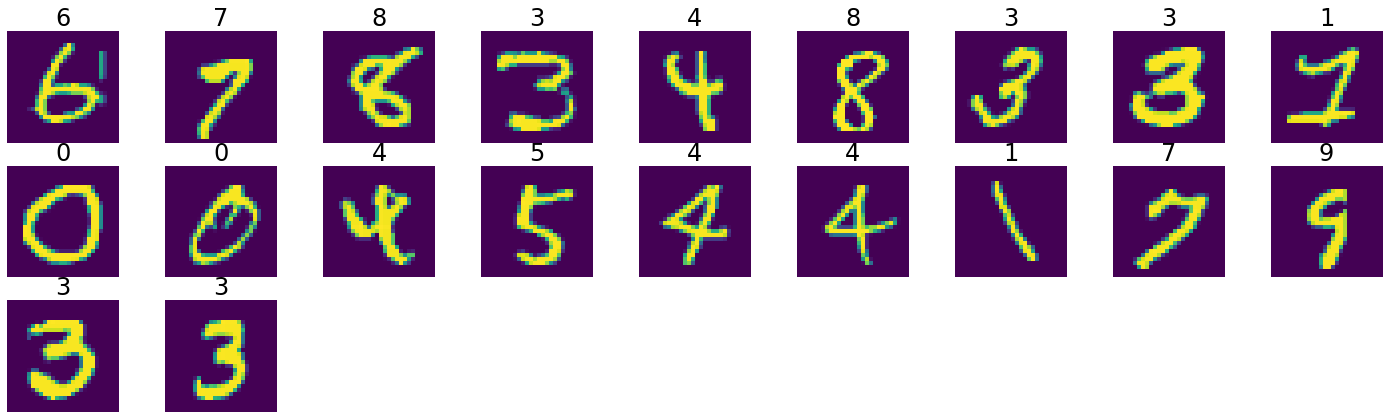

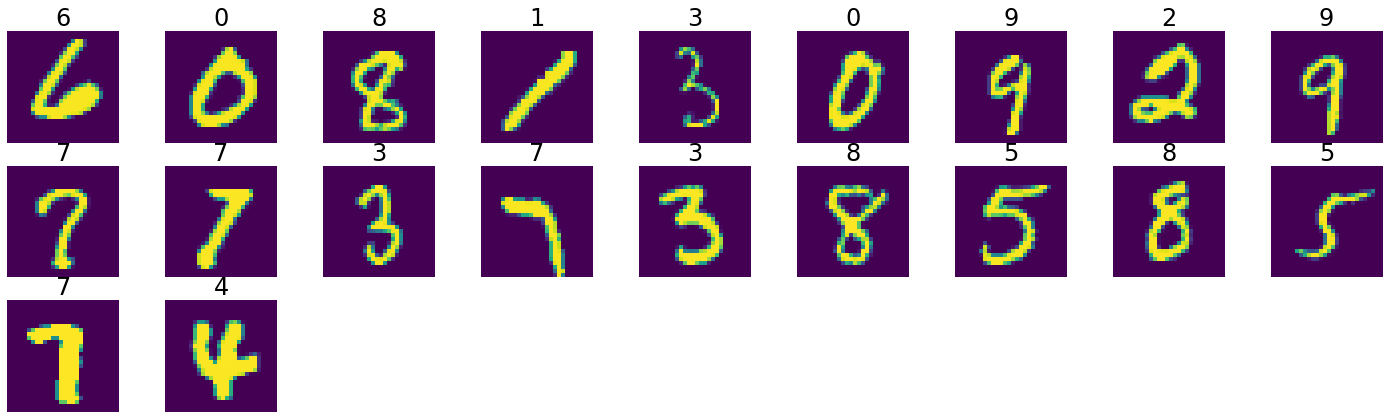

In [3]:
(x_train,y_train),(x_test,y_test) =  keras.datasets.mnist.load_data()
# show hte data:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

libfile.plot_images_rand(x_train,y_train,subset_im_numb=20,figsize=(25,7))
libfile.plot_images_rand(x_test,y_test,subset_im_numb=20,figsize=(25,7))

In [4]:
# Normalization
xmax = x_train.max()
print(xmax)
x_train = x_train / xmax
x_test = x_test / xmax
print(x_train.max())

255
1.0


In [5]:
# Build a model :

model = keras.models.Sequential([
    keras.layers.Input((28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [6]:
# train the model:
history= model.fit(x_train,y_train,verbose=1, batch_size = 512, epochs =20 , validation_data =(x_test,y_test))

Epoch 1/20
118/118 [==============================] - 3s 29ms/step - loss: 0.5778 - accuracy: 0.8385 - val_loss: 0.2476 - val_accuracy: 0.9267
Epoch 2/20
118/118 [==============================] - 3s 25ms/step - loss: 0.2126 - accuracy: 0.9392 - val_loss: 0.1729 - val_accuracy: 0.9474
Epoch 3/20
118/118 [==============================] - 2s 19ms/step - loss: 0.1560 - accuracy: 0.9554 - val_loss: 0.1366 - val_accuracy: 0.9587
Epoch 4/20
118/118 [==============================] - 3s 22ms/step - loss: 0.1255 - accuracy: 0.9635 - val_loss: 0.1191 - val_accuracy: 0.9637
Epoch 5/20
118/118 [==============================] - 3s 29ms/step - loss: 0.1040 - accuracy: 0.9696 - val_loss: 0.1014 - val_accuracy: 0.9697
Epoch 6/20
118/118 [==============================] - 4s 33ms/step - loss: 0.0883 - accuracy: 0.9744 - val_loss: 0.0911 - val_accuracy: 0.9721
Epoch 7/20
118/118 [==============================] - 4s 31ms/step - loss: 0.0772 - accuracy: 0.9777 - val_loss: 0.0915 - val_accuracy: 0.9714

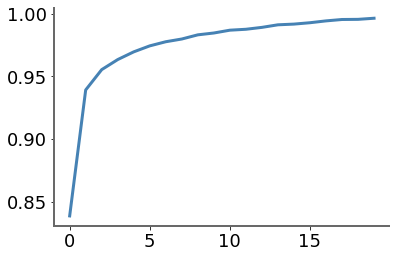

In [7]:
# evaluate:
plt.plot(np.array(history.history['accuracy']))
#plt.plot(np.array(history.history['loss']))

#plt.plot(np.array(pd.DataFrame(history.history)))

#print(history.history)
#pwk.plot_history(history)

In [8]:
# evaluate:
score =  model.evaluate(x_test,y_test)
print('loss, accuracy = ' ,score)

313/313 [==============================] - 4s 12ms/step - loss: 0.0787 - accuracy: 0.9773
loss, accuracy =  [0.07867797464132309, 0.9772999882698059]


In [14]:
ye = model.predict(x_test)
print(ye[0])

[4.9969635e-06 4.0281259e-07 3.7732170e-05 8.7329163e-04 2.2466686e-11
 3.0967694e-08 1.1352118e-12 9.9899918e-01 1.7598294e-06 8.2624683e-05]


[1.7688356e-11 1.3558905e-10 1.6319663e-11 9.9997640e-01 1.4100866e-13
 2.3505138e-05 3.9237304e-13 1.0175557e-12 5.9762120e-09 1.4616386e-07]
[3]


Text(0.5, 1.0, '[3]')

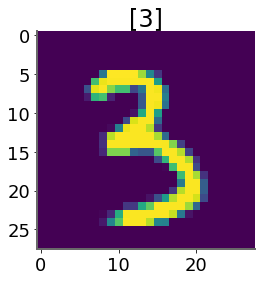

In [15]:
# predict:
img =np.array([x_test[32]])

y_sigmoid = model.predict(img)
print(y_sigmoid[0])
y_pred  = np.argmax(y_sigmoid, axis=-1)
print(y_pred)
plt.imshow(img[0])
plt.title(y_pred)

In [ ]:
print(/)

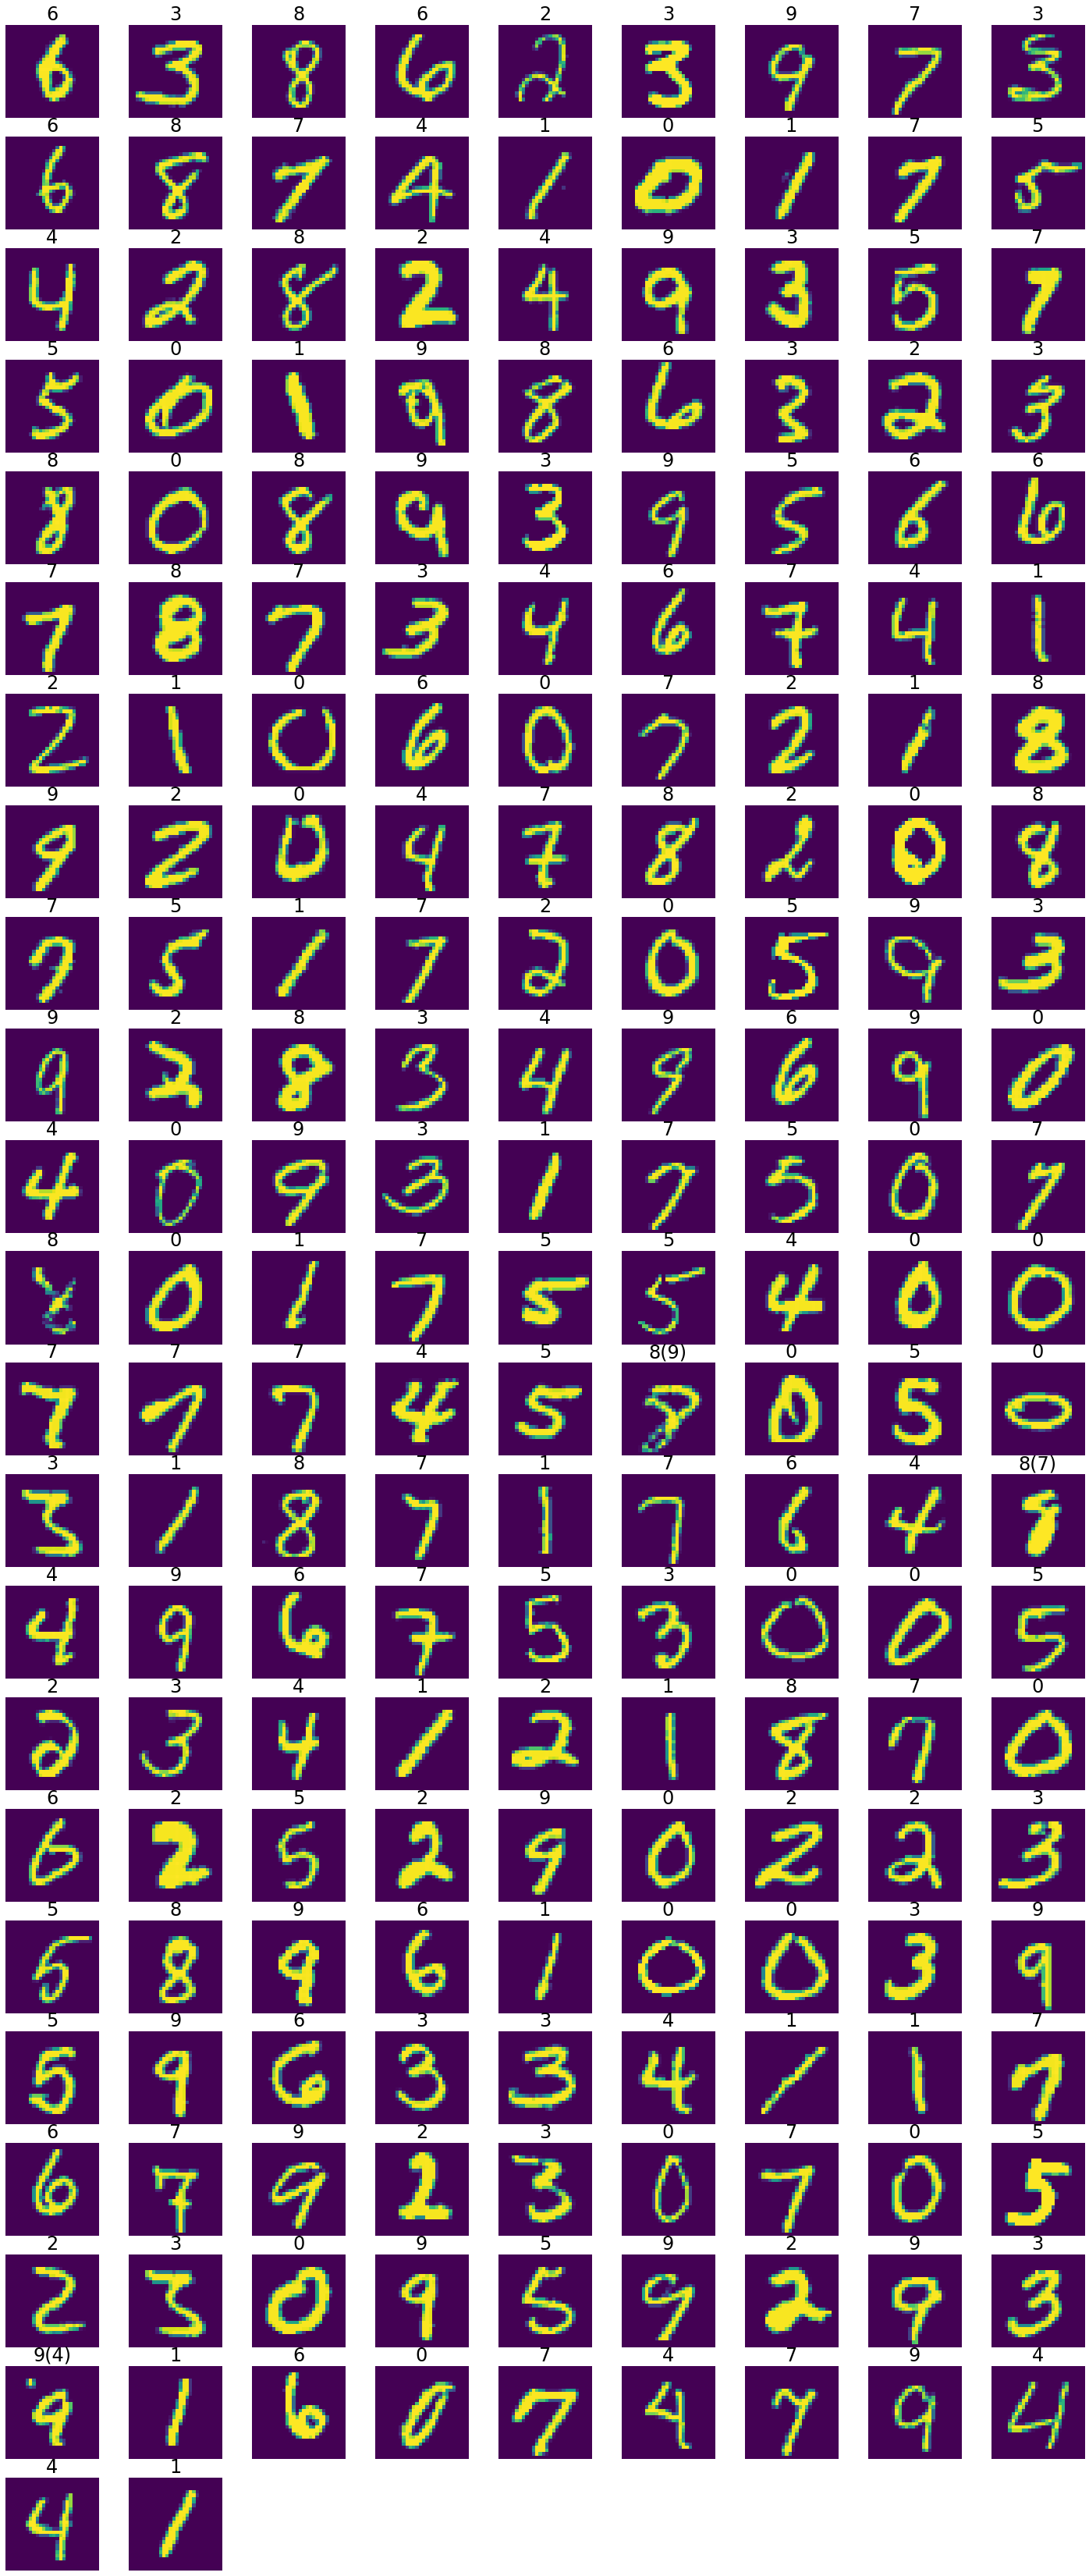

In [20]:
y_sigmoid = model.predict(x_test)
y_pred  = np.argmax(y_sigmoid, axis=-1)
libfile.plot_images_rand(x_test,y_test,subset_im_numb=200,figsize=(25,60),pred=y_pred)